In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [49]:
tk = th.Thicket.from_caliperreader(glob("24-cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:01<00:00, 37.14it/s]


In [50]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

3.793 main
├─ 1.291 main
│  ├─ 1.232 comm_large
│  │  ├─ 0.041 mpi_recv
│  │  └─ 1.341 mpi_send
│  ├─ 0.059 comp_large
│  ├─ 0.048 correctness_check
│  └─ 0.046 data_init_runtime
└─ 2.496 mpi_init

Legend (Metric: Avg time/rank Min: 0.04 Max: 3.79 indices: {'profile': 40368556})
█ 3.42 - 3.79
█ 2.67 - 3.42
█ 1.92 - 2.67
█ 1.17 - 1.92
█ 0.42 - 1.17
█ 0.04 - 0.42

name User code    ◀  Only in left graph    ▶  Only in right graph



In [2]:
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [3]:
def plot_mpl(df, title, xlabel, col):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = df['input_type'].unique()
    for label in labels:
        subset = df[df['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset[col], marker='o', label=label+' '+col[0:3])

        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(col)
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [53]:
tk.dataframe.head()

nid   spot.channel  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 40368556   1.0  regionprofile   
                                     271538845  1.0  regionprofile   
                                     500002216  1.0  regionprofile   
                                     562297092  1.0  regionprofile   
                                     633508633  1.0  regionprofile   

                                                Min time/rank  Max time/rank  \
node                                 profile                                   
{'name': 'main', 'type': 'function'} 40368556        2.503329      31.541047   
                                     271538845       2.930791      60.429036   
                                     500002216       1.292275       1.844217   
                                     562297092       1.821224       3.681490   
                                     633508633       2.530291      16.665159   

                                                Avg time/rank   Total time  \
node                                 profile                                 
{'name': 'main', 'type': 'function'} 40368556        3.792958  1941.994532   
                                     271538845       5.591808  5726.011171   
                                     500002216       1.388914    11.111310   
                                     562297092       1.904312    60.937995   
                                     633508633       2.739183   701.230864   

                                                Min time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.005276   
                                     271538845             0.005280   
                                     500002216             0.005536   
                                     562297092             0.005389   
                                     633508633             0.005288   

                                                Max time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.006473   
                                     271538845             0.007566   
                                     500002216             0.006078   
                                     562297092             0.007734   
                                     633508633             0.029043   

                                                Avg time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.005560   
                                     271538845             0.005584   
                                     500002216             0.005836   
                                     562297092             0.006457   
                                     633508633             0.007910   

                                                Total time (exc)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 40368556           2.846680   
                                     271538845          5.718026   
                                     500002216          0.046687   
                                     562297092          0.206625   
                                     633508633          2.025048   

                                                Calls/rank (min)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 40368556                NaN   
                                     271538845               NaN   
                                     500002216               NaN   
                                     562297092               NaN   
                                     633508633               NaN   

 

In [54]:
 # Access the Adiak metadata associated with a specific node in the call tree
print(tk.metadata.columns)
array_types = tk.metadata["input_type"]
num_procs = tk.metadata['num_procs'] + 1

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:region.count', 'spot:time.exclusive', 'launchdate', 'libraries',
       'cmdline', 'cluster', 'algorithm', 'programming_model', 'data_type',
       'size_of_data_type', 'input_size', 'input_type', 'num_procs',
       'scalability', 'group_num', 'implementation_source'],
      dtype='object')


In [4]:
tks = {}

for i in range(16, 30, 2):
    thicket_data = th.Thicket.from_caliperreader(glob(f"{i}-cali/*.cali"))
    
    # df = thicket_data.dataframe

    tks[f'tk{i}'] = thicket_data

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:01<00:00, 35.86it/s]


In [5]:
def plot(df, sz):
    main_time = df.dataframe.loc[df.get_node("main")[0], ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    # main_time.sort_values(by='num_procs').tail(20)
    plot_mpl(
        df=main_time,
        title=f"Total Main Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Max time/rank"
    )
    
    comm_time = df.dataframe.loc[df.get_node("comm_large"), ["Avg time/rank"]]
    comm_time = pd.merge(comm_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comm_time,
        title=f"Avg Comm Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )

    comp_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    comp_time = pd.merge(comp_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comp_time,
        title=f"Avg Comp Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )


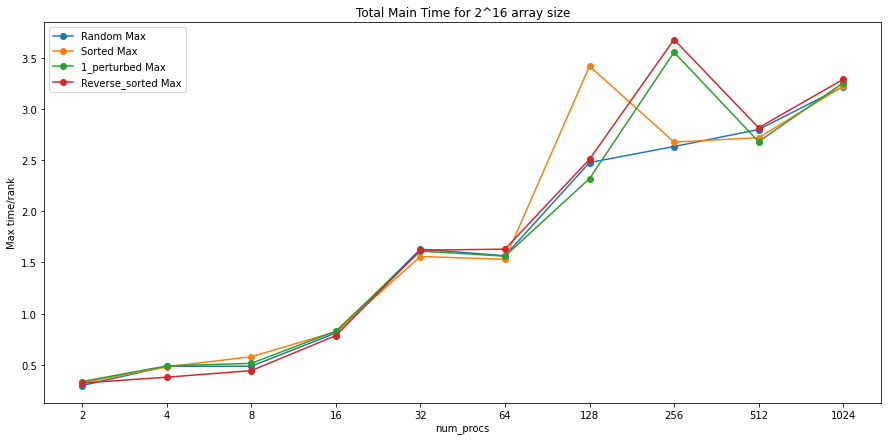

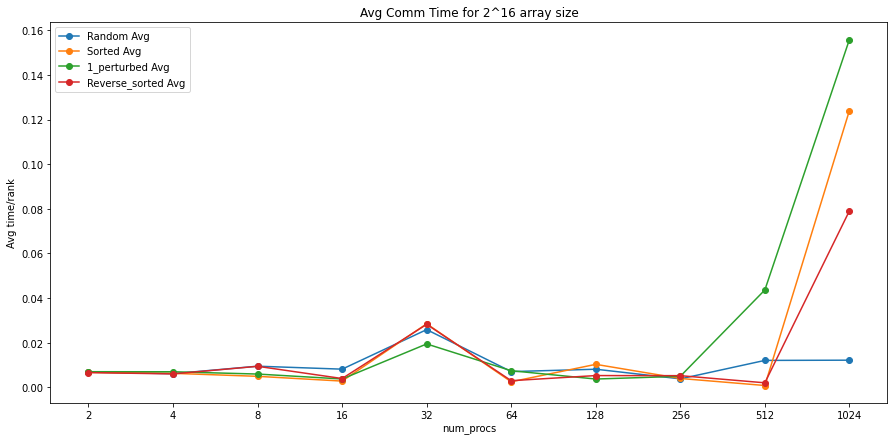

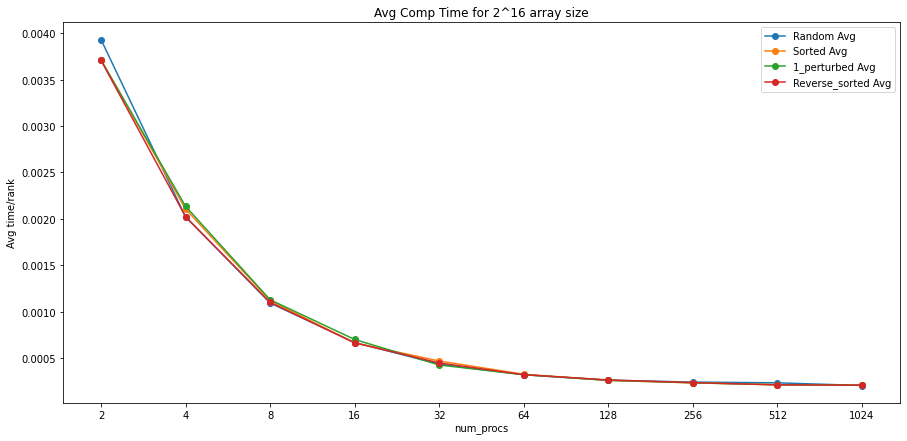

In [80]:
# call for all dataframes for each input size
plot(tks['tk16'], 16)

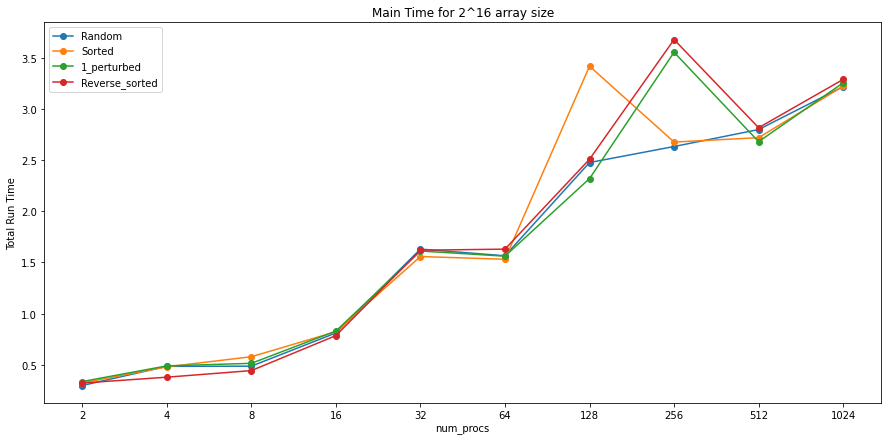

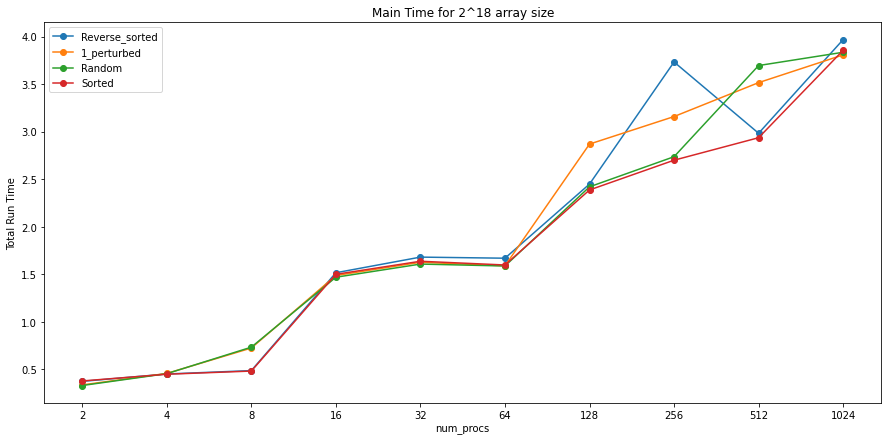

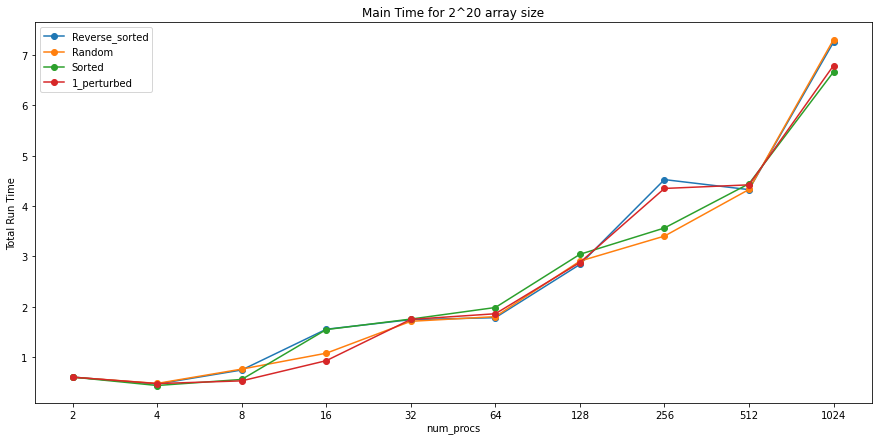

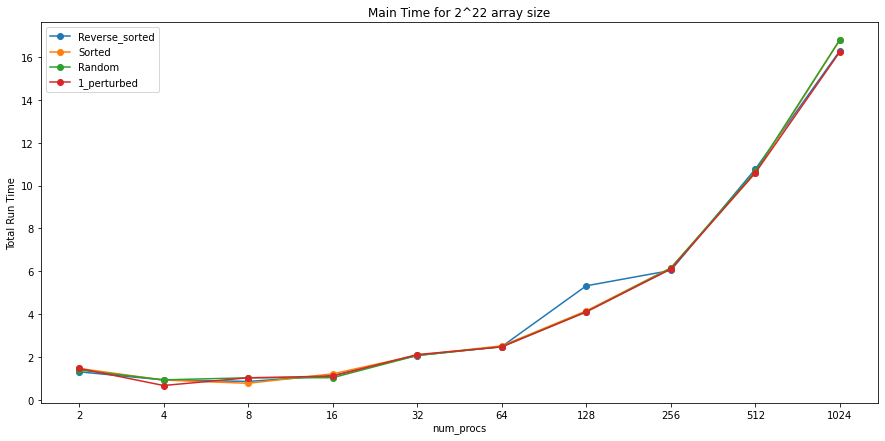

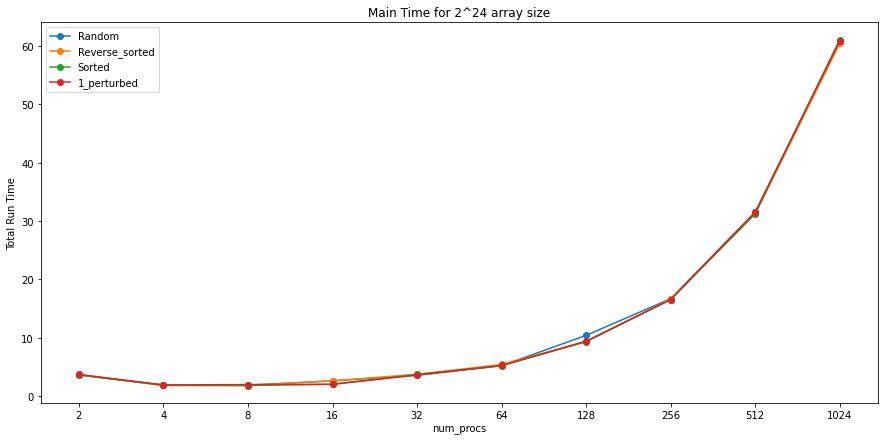

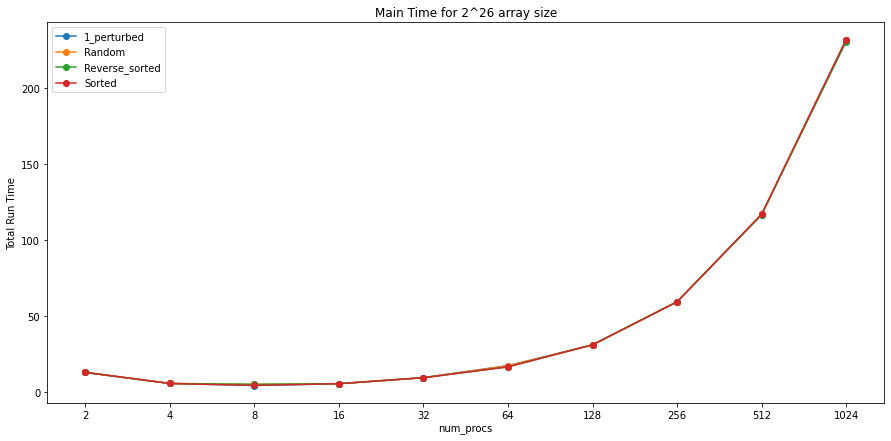

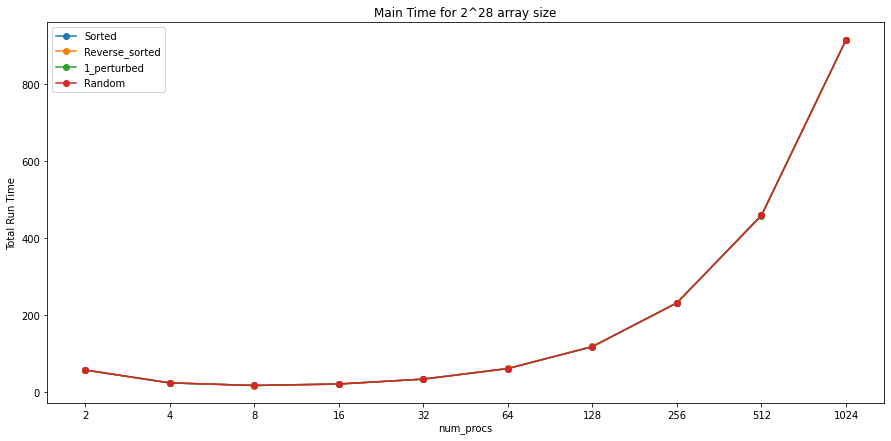

In [88]:
# all strong scaling main graphs
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("main")[0], ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label=label)

        
    ax.set_title(f'Main Time for {size_labels[i]} array size')
    ax.set_xlabel('num_procs')
    ax.set_ylabel("Total Run Time")
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()


{'Random': [0.003931, 0.009407, 0.021809, 0.05332, 0.141214, 0.40697, 1.288961], 'Sorted': [0.003714, 0.009392, 0.02189, 0.053199, 0.142907, 0.405128, 1.291462], '1_perturbed': [0.003711, 0.009193, 0.02156, 0.052961, 0.142932, 0.406483, 1.287963], 'Reverse_sorted': [0.003707, 0.009177, 0.021793, 0.053272, 0.143639, 0.406871, 1.329839]}


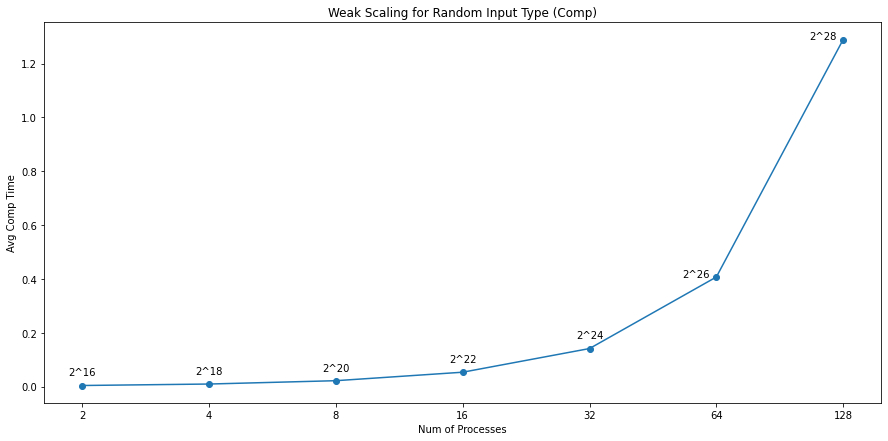

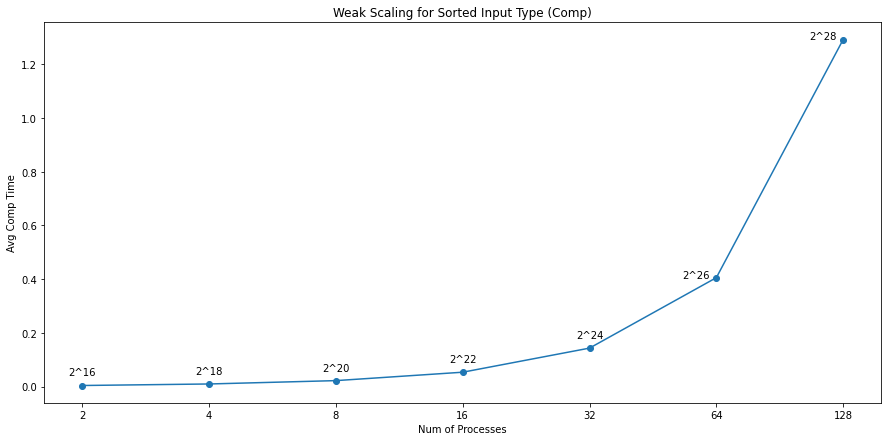

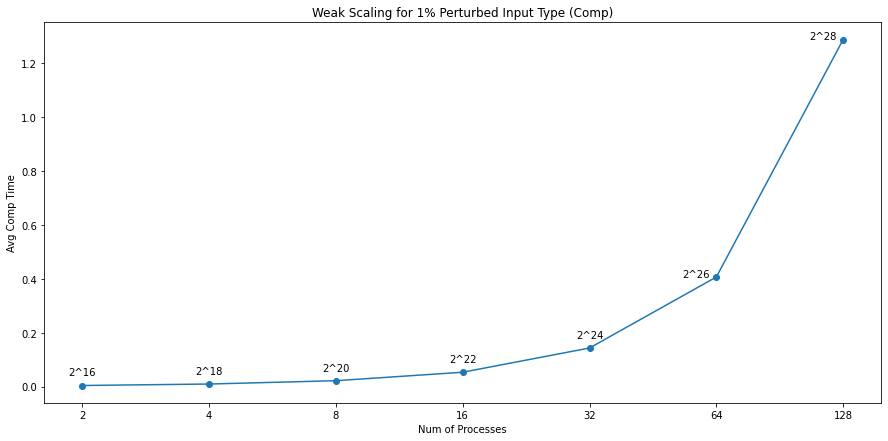

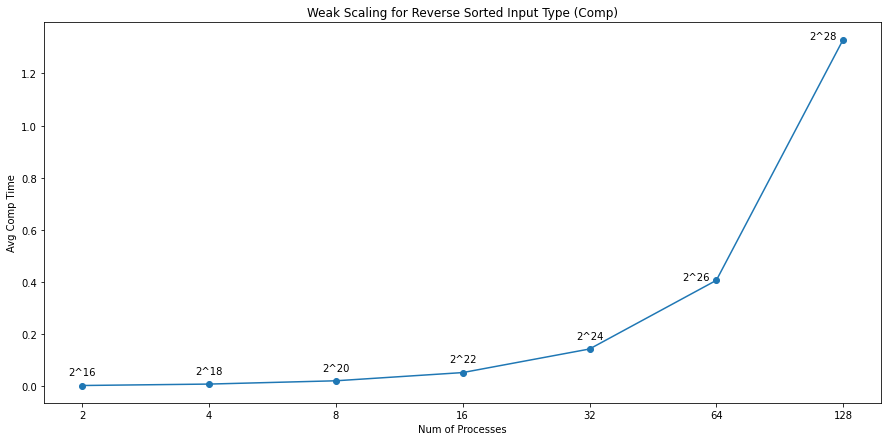

In [9]:
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
times = {label : [] for label in input_types}
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        times[label].append(subset.loc[subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
        

print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(processes[0:7], times[label], marker='o')
    for i, txt in enumerate(size_labels):
        if i < 5:
            x = 0
            y = 10
        else:
            x = -20
            y = 0
        ax.annotate(txt, (processes[i], times[label][i]), textcoords="offset points", 
                    xytext=(x,y), ha='center')
    ax.set_title(f'Weak Scaling for {plt_names[curr]} Input Type (Comp)')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    plt.xscale("log", base=2)
    plt.xticks(processes[0:7])
    ax.set_xticklabels(processes[0:7])
    plt.show()
    curr += 1


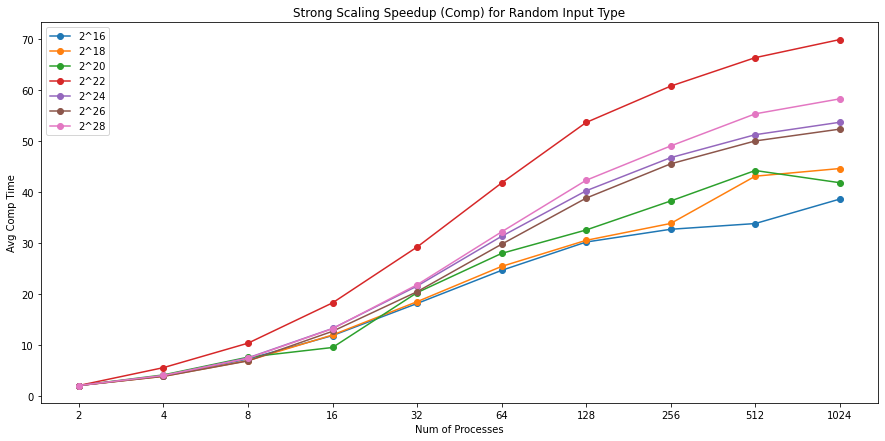

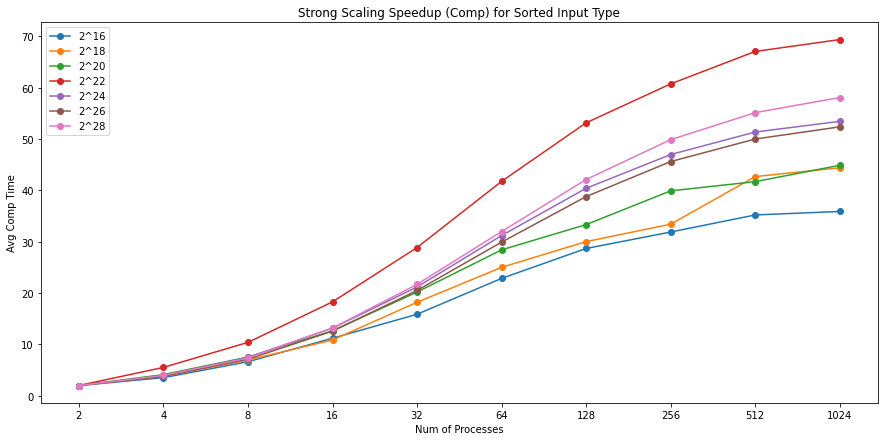

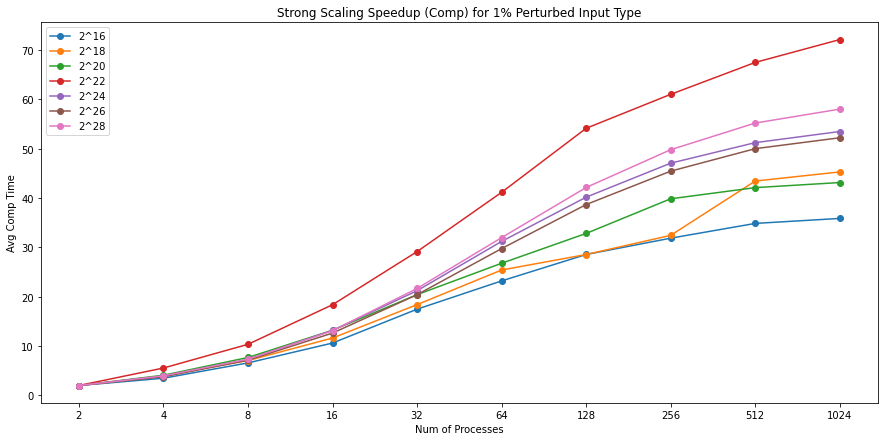

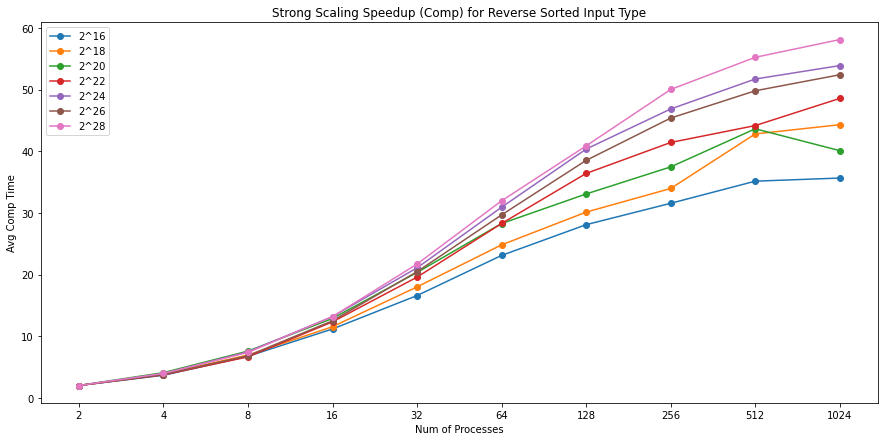

In [11]:
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']
times = {label : {sz : [] for sz in size_labels} for label in input_types}

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        subset_times = (2 * subset['Avg time/rank'].values[0]) / subset['Avg time/rank'].values
        
        times[label][size_labels[i]] = subset_times.tolist() 

# print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    for sz in size_labels:
        ax.plot(processes, times[label][sz], marker='o', label=sz)
    ax.set_title(f'Strong Scaling Speedup (Comp) for {plt_names[curr]} Input Type')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    curr += 1


In [2]:
tkcm = th.Thicket.from_caliperreader(glob("cm-cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 17.21it/s]


(12,)
(12,)


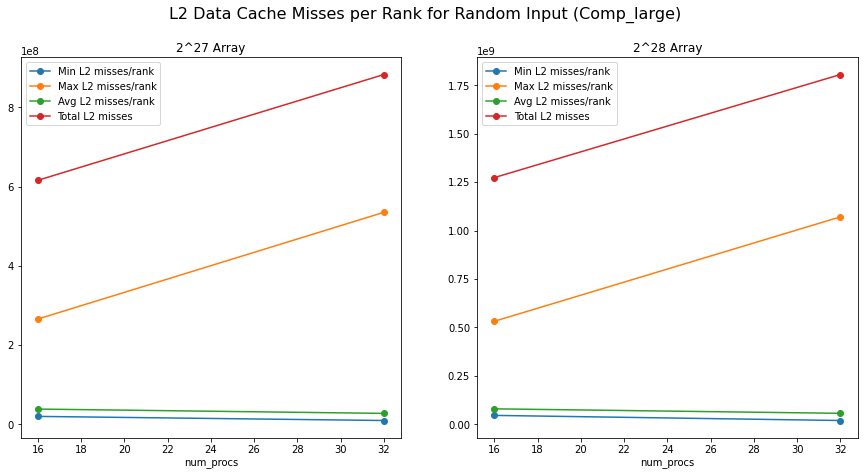

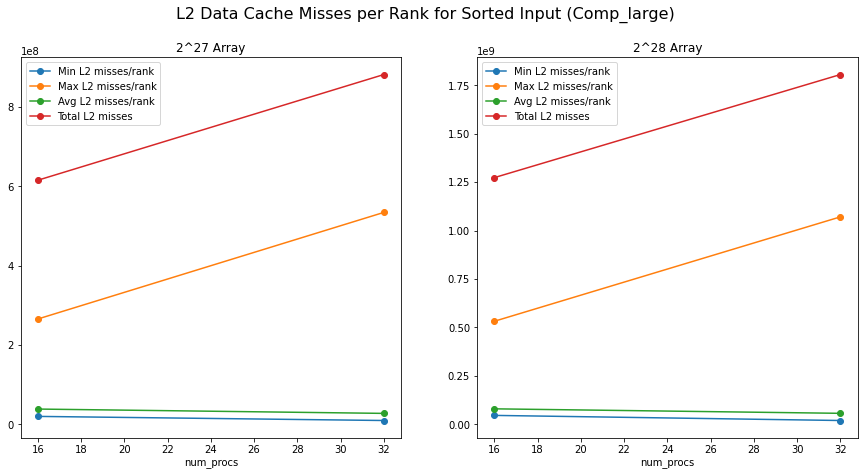

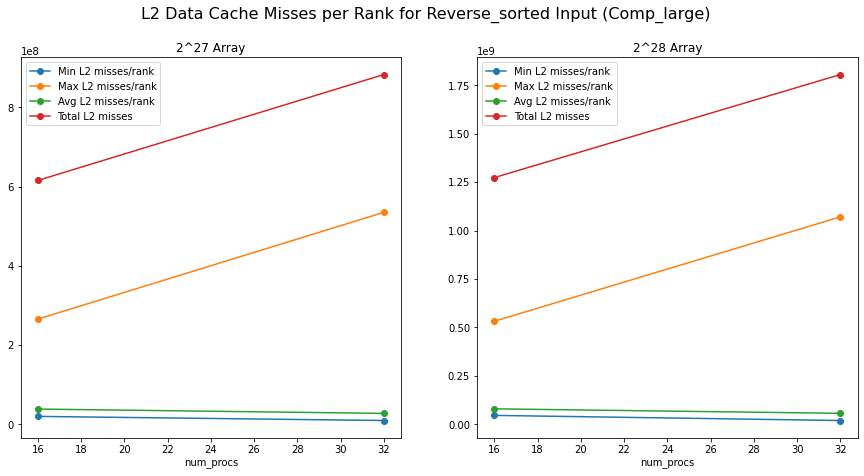

In [106]:
linesL1 = ["Min L1 misses/rank","Max L1 misses/rank", "Avg L1 misses/rank","Total L1 misses"]
linesL2 = ["Min L2 misses/rank","Max L2 misses/rank", "Avg L2 misses/rank","Total L2 misses"]
input_types = ['Random', 'Sorted', 'Reverse_sorted']


mpi_world_size = tkcm.metadata['mpi.world.size']
input_sizes = tkcm.metadata["input_size"]
array_types = tkcm.metadata["input_type"]

print(mpi_world_size.shape)
print(input_sizes.shape)
main_time = tkcm.dataframe.loc[tkcm.get_node("comp_large"), linesL2]
main_time = pd.merge(main_time, input_sizes, on="profile").merge(mpi_world_size, on="profile").merge(array_types, on ="profile")

for type in input_types:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    subset = main_time[main_time['input_size'] == 134217728]
    subset = subset[subset['input_type'] == type]
    for line in linesL2:
        ax1.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax1.set_title(f'2^27 Array')
    ax1.set_xlabel('num_procs')
    ax1.legend()
    
    
    subset = main_time[main_time['input_size'] == 268435456]
    subset = subset[subset['input_type'] == type]

    for line in linesL2:
        ax2.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax2.set_title(f'2^28 Array')
    ax2.set_xlabel('num_procs')
    ax2.legend()
    fig.suptitle(f'L2 Data Cache Misses per Rank for {type} Input (Comp_large)', fontsize=16)

    plt.show()